In [5]:
# Importing necessary libraries
from dagshub.upload import Repo
import mlflow
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from mlflow.models.signature import infer_signature
from mlflow.tensorflow import log_model as log_keras_model

In [6]:
from dotenv import load_dotenv
import os

# Load environment variables from the .env file
load_dotenv("../.env")

# Get the environment variables
DagsHub_username = os.getenv("DagsHub_username")
DagsHub_token = os.getenv("DagsHub_token")


In [7]:
print(DagsHub_username)


hentatiamin0


In [8]:
os.environ['MLFLOW_TRACKING_USERNAME']= DagsHub_username
os.environ["MLFLOW_TRACKING_PASSWORD"] = DagsHub_token

In [9]:
# 1. Initialize DagsHub and MLflow
# ------------------------------


mlflow.set_tracking_uri("https://dagshub.com/hentatiamin0/gold-price-prediction.mlflow")


In [10]:
# ------------------------------
# 1. Load and Prepare the Dataset
# ------------------------------
# Load the training and test datasets
train_data = pd.read_csv('../data/gold_data_train.csv')
test_data = pd.read_csv('../data/gold_data_test.csv')

# Split features (X) and target (y)
X_train = train_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
y_train = train_data['Close']

X_test = test_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
y_test = test_data['Close']

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_scaled = scaler.fit_transform(train_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']])
test_data_scaled = scaler.transform(test_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']])


In [11]:
# ------------------------------
# 2. Define Traditional ML Models
# ------------------------------
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

In [12]:
# ------------------------------
# 3. MLflow Experiment Setup
# ------------------------------
# Configure MLflow experiment
mlflow.set_experiment("Gold Price Forecasting")

# Function to log metrics to MLflow
def log_metrics(model_name, mae, mse, rmse, r2):
    mlflow.log_param("model_name", model_name)
    mlflow.log_metric("MAE", mae)
    mlflow.log_metric("MSE", mse)
    mlflow.log_metric("RMSE", rmse)
    mlflow.log_metric("R2", r2)

2024/12/17 10:20:19 INFO mlflow.tracking.fluent: Experiment with name 'Gold Price Forecasting' does not exist. Creating a new experiment.


2024/12/17 10:20:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Linear Regression at: https://dagshub.com/hentatiamin0/gold-price-prediction.mlflow/#/experiments/0/runs/ecfd45f73afd435cb1ceb65448947670
🧪 View experiment at: https://dagshub.com/hentatiamin0/gold-price-prediction.mlflow/#/experiments/0


2024/12/17 10:20:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Decision Tree at: https://dagshub.com/hentatiamin0/gold-price-prediction.mlflow/#/experiments/0/runs/8523744ac4134ac2af193e43adc33a40
🧪 View experiment at: https://dagshub.com/hentatiamin0/gold-price-prediction.mlflow/#/experiments/0


2024/12/17 10:20:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Random Forest at: https://dagshub.com/hentatiamin0/gold-price-prediction.mlflow/#/experiments/0/runs/a4145877c16e4e51b92f870f289030d6
🧪 View experiment at: https://dagshub.com/hentatiamin0/gold-price-prediction.mlflow/#/experiments/0


2024/12/17 10:21:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Gradient Boosting at: https://dagshub.com/hentatiamin0/gold-price-prediction.mlflow/#/experiments/0/runs/cbd206982d8447de86097c66bae1263b
🧪 View experiment at: https://dagshub.com/hentatiamin0/gold-price-prediction.mlflow/#/experiments/0


2024/12/17 10:21:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run XGBoost at: https://dagshub.com/hentatiamin0/gold-price-prediction.mlflow/#/experiments/0/runs/504ce0a069fb46b7bb4027dfb672b3ff
🧪 View experiment at: https://dagshub.com/hentatiamin0/gold-price-prediction.mlflow/#/experiments/0
                            MAE           MSE          RMSE        R2
Linear Regression  4.910304e-13  6.165355e-25  7.851978e-13  1.000000
Decision Tree      7.167516e-01  5.605080e+00  2.367505e+00  0.999954
Random Forest      5.060733e-01  2.487579e+00  1.577206e+00  0.999980
Gradient Boosting  2.182036e+00  1.305527e+01  3.613207e+00  0.999893
XGBoost            2.017186e+00  2.157339e+01  4.644716e+00  0.999824


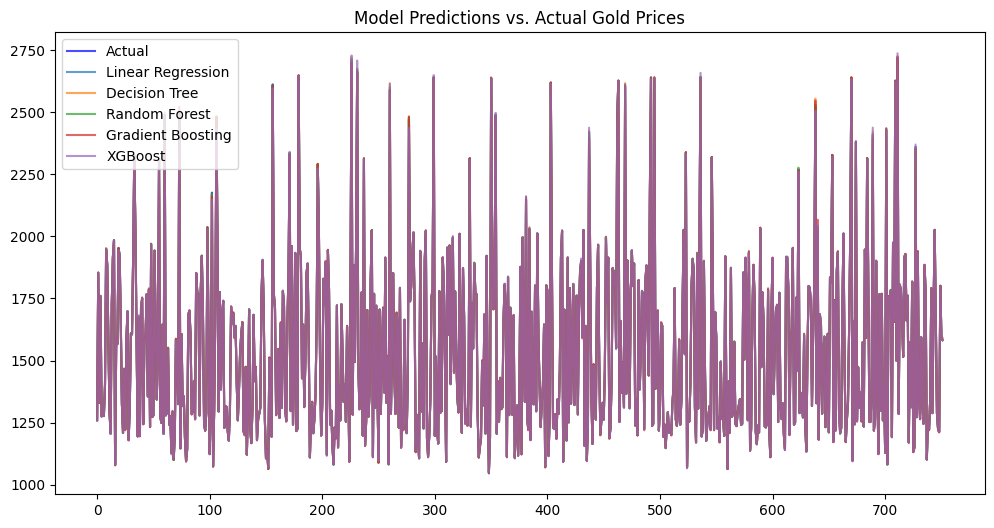

In [13]:
# ------------------------------
# 4. Train and Evaluate Traditional ML Models
# ------------------------------
# Evaluate traditional models
results = {}

for model_name, model in models.items():
    with mlflow.start_run(run_name=f"{model_name}"):
        # Train model
        model.fit(X_train, y_train)
        
        # Predict and evaluate
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        # Log results to MLflow
        log_metrics(model_name, mae, mse, rmse, r2)
        mlflow.sklearn.log_model(model, model_name)

        # Save metrics
        results[model_name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

# Create a DataFrame to visualize the results
results_df = pd.DataFrame(results).T
print(results_df)
# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual", color='blue', alpha=0.7)

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    plt.plot(y_pred, label=f"{model_name}", alpha=0.7)

plt.title('Model Predictions vs. Actual Gold Prices')
plt.legend()
plt.savefig("model_predictions.png")
mlflow.log_artifact("model_predictions.png")
plt.show()



In [14]:
# ------------------------------
# 5. Build and Train LSTM Model
# ------------------------------
# Prepare data for LSTM
x_train, y_train = [], []
for i in range(60, len(train_data_scaled)):
    x_train.append(train_data_scaled[i-60:i])
    y_train.append(train_data_scaled[i, 3])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], 60, 6))

x_test, y_test_lstm = [], []
for i in range(60, len(test_data_scaled)):
    x_test.append(test_data_scaled[i-60:i])
    y_test_lstm.append(test_data_scaled[i, 3])

x_test, y_test_lstm = np.array(x_test), np.array(y_test_lstm)
x_test = np.reshape(x_test, (x_test.shape[0], 60, 6))
# Define LSTM model
model_lstm = Sequential([
    LSTM(50, return_sequences=True, input_shape=(60, 6)),
    LSTM(64, return_sequences=False),
    Dense(32, activation='relu'),
    Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mean_absolute_error')
mlflow.end_run()
# Train LSTM with MLflow logging
with mlflow.start_run(run_name="LSTM Model"):
    history = model_lstm.fit(x_train, y_train, epochs=50, batch_size=32, verbose=1)
    
    # Predict and evaluate
    y_pred_lstm = model_lstm.predict(x_test)
    mae = mean_absolute_error(y_test_lstm, y_pred_lstm)
    mse = mean_squared_error(y_test_lstm, y_pred_lstm)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_lstm, y_pred_lstm)

    # Log results to MLflow
    log_metrics("LSTM", mae, mse, rmse, r2)
    mlflow.keras.log_model(model_lstm, "LSTM Model")
# Print LSTM results
print(f"LSTM Model Performance: MAE={mae}, RMSE={rmse}, R2={r2}")


C:\Users\henta\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


🏃 View run sincere-bass-240 at: https://dagshub.com/hentatiamin0/gold-price-prediction.mlflow/#/experiments/0/runs/d7576e93dc5e4af8855a17e407b855aa
🧪 View experiment at: https://dagshub.com/hentatiamin0/gold-price-prediction.mlflow/#/experiments/0
Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.1732
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.1641
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.1657
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.1677
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.1676
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1643
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.1680
Epoch 8/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.1649
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.1689
Epoch 10/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.1621
Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.1618
Epoch 12/50
93/93 ━━━━━━

2024/12/17 10:24:44 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/12/17 10:24:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LSTM Model at: https://dagshub.com/hentatiamin0/gold-price-prediction.mlflow/#/experiments/0/runs/82f2385420f34247a9a29c731e5a8928
🧪 View experiment at: https://dagshub.com/hentatiamin0/gold-price-prediction.mlflow/#/experiments/0
LSTM Model Performance: MAE=0.1667190435155281, RMSE=0.2176258408721909, R2=-0.13169675708017414


In [15]:
# ------------------------------
# 6. Run MLflow Tracking UI
# ------------------------------
print("To view MLflow results, run 'mlflow ui' and open http://localhost:5000")

To view MLflow results, run 'mlflow ui' and open http://localhost:5000


In [16]:
import mlflow

print("Current MLflow Tracking URI:", mlflow.get_tracking_uri())


Current MLflow Tracking URI: https://dagshub.com/hentatiamin0/gold-price-prediction.mlflow
